__*Name: Gaurav Kumar*__

__*Roll Number: 19HCS4017*__

__*Course: BSc(Hons) Computer Science*__

__*Semester: 6th*__

__*Paper: Data Mining*__

Q1. Create a file “people.txt” with the following data:

        Age	agegroup	height	status	    yearsmarried

        21	adult	        6.0	single	        -1

        2	child	        3	married	        0

        18	adult	        5.7	married	        20

        221	elderly	        5	widowed	        2

        34	child	        -7	married	        3

i)	Read the data from the file “people.txt”.

ii)	Create a ruleset E that contain rules to check for the following conditions:
1.	The age should be in the range 0-150.
2.	The age should be greater than yearsmarried.
3.	The status should be married or single or widowed.
4.	If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.

iii)	Check whether ruleset E is violated by the data in the file people.txt.

iv) 	Summarize the results obtained in part (iii)

v)	 Visualize the results obtained in part (iii)


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [24]:
def ruleSet(df):
    newDf = df.copy(deep =True)
    newDf["Rule1"] = df["age"].apply(lambda x: True if x>= 0 and x <= 150 else False)
    newDf["Rule2"] = df.apply(lambda x: True if x.age > x.yearsmarried else False, axis=1)
    newDf["Rule3"] = df["status"].apply(lambda x: True if x== "single" or x == "married" or x == "widowed" else False)
    newDf["Rule4"] = df.apply(lambda x: True if (x.age < 18 and x.agegroup =="child") or (x.age >= 18 and x.age <= 65 and x.agegroup =="adult") or (x.age > 65 and x.agegroup =="elderly") else False, axis=1)
    return newDf

In [25]:
dataset = pd.read_csv("people.txt", sep=" ")
dataset.head()

,age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [26]:
afterRuleData = ruleSet(dataset)
afterRuleData.head()

,age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3,Rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,True
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


In [27]:
afterRuleData[["Rule1","Rule2","Rule3","Rule4"]] = afterRuleData[["Rule1","Rule2","Rule3","Rule4"]].astype(int)


In [28]:
afterRuleData[["Rule1","Rule2","Rule3","Rule4"]].describe()

,Rule1,Rule2,Rule3,Rule4
count,5.000000,5.000000,5.0,5.000000
mean,0.800000,0.800000,1.0,0.800000
std,0.447214,0.447214,0.0,0.447214
min,0.000000,0.000000,1.0,0.000000
25%,1.000000,1.000000,1.0,1.000000
50%,1.000000,1.000000,1.0,1.000000
75%,1.000000,1.000000,1.0,1.000000
max,1.000000,1.000000,1.0,1.000000


The describe table represent the various statistical data for the columns for which it is called. Count represent the number of valid or non nan values in the series or column, mean represent the mean of each column. std is the standard deviation of each one, min represent the minimum value in the complete column, and the percentiles representing that how much instance have less or equal to 25 %, 50% and 75% respectively.

<AxesSubplot:>

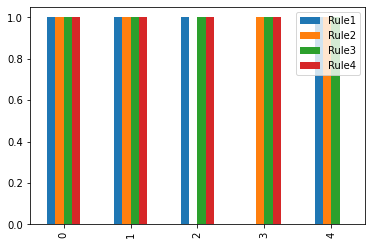

In [29]:
afterRuleData.plot(y=["Rule1","Rule2","Rule3","Rule4"],kind ="bar")

Here the given bar graph represent the number of rules satisfied from the rule set by each instance of the data set. Here, in case of instance 1 it is having all 4 bars visible which represents that all the rules in rule set are getting satisfied.
